In [20]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

In [11]:
train = pd.read_csv('/Users/shotomorisaki/Desktop/翔斗/#7 Programming/titanic/train.csv')
test = pd.read_csv('/Users/shotomorisaki/Desktop/翔斗/#7 Programming/titanic/test.csv')

In [12]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [23]:
women = train.loc[train.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women) * 100

print("Percent of women who survived:", round(rate_women), "%")

male = train.loc[train.Sex == 'male']["Survived"]
rate_male = sum(male)/len(male) * 100

print("Percent of male who survived:", round(rate_male) , "%")

Percent of women who survived: 74 %
Percent of male who survived: 19 %


In [21]:
y = train["Survived"]

features = ["Pclass", "Sex", "SibSp", "Parch"]
X = pd.get_dummies(train[features])
X_test = pd.get_dummies(train[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': train.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [6]:
def clean(data):
    data = data.drop(["Ticket", "Cabin", "Name", "PassengerId"], axis = 1)

    cols = ["SibSp", "Parch", "Fare", "Age"]
    for col in cols:
        data[col].fillna(data[col].median(), inplace = True)
    
    data.Embarked.fillna("U", inplace = True)
    return data

In [7]:
data = clean(data)
test = clean(test)

In [8]:
data.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<AxesSubplot:xlabel='Age', ylabel='Count'>

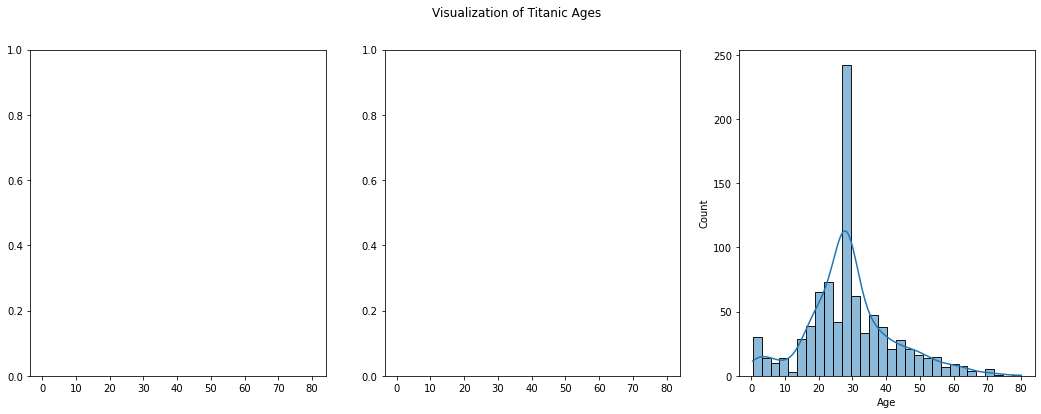

In [9]:
figure, axes = plt.subplots(1, 3, sharex=True, figsize=(18,6))
figure.suptitle('Visualization of Titanic Ages')
sns.histplot(data['Age'] , kde=True)